In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
classifier = Sequential()

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (40, 40, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 50, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##Fitting the CNN model to dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [4]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train', target_size = (40, 40),
                                                 batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Dataset/Test', target_size = (40, 40),
                                            batch_size = 32, class_mode = 'categorical')


Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [5]:
classifier.fit(training_set, steps_per_epoch = 358, epochs = 100,
                         validation_data = test_set, validation_steps = 100)

Epoch 1/100
358/358 [==============================] - 481s 1s/step - loss: 3.4554 - accuracy: 0.1212 - val_loss: 1.1631 - val_accuracy: 0.6837
Epoch 2/100
358/358 [==============================] - 64s 178ms/step - loss: 1.5602 - accuracy: 0.5506
Epoch 3/100
358/358 [==============================] - 59s 163ms/step - loss: 1.1564 - accuracy: 0.6612
Epoch 4/100
358/358 [==============================] - 64s 178ms/step - loss: 0.9956 - accuracy: 0.7092
Epoch 5/100
358/358 [==============================] - 65s 182ms/step - loss: 0.8698 - accuracy: 0.7392
Epoch 6/100
358/358 [==============================] - 71s 198ms/step - loss: 0.8076 - accuracy: 0.7468
Epoch 7/100
358/358 [==============================] - 60s 166ms/step - loss: 0.7283 - accuracy: 0.7781
Epoch 8/100
358/358 [==============================] - 65s 181ms/step - loss: 0.6888 - accuracy: 0.7913
Epoch 9/100
358/358 [==============================] - 66s 184ms/step - loss: 0.6589 - accuracy: 0.8012
Epoch 10/100
358/358 [==

358/358 [==============================] - 89s 248ms/step - loss: 0.2188 - accuracy: 0.9291
Epoch 75/100
358/358 [==============================] - 89s 250ms/step - loss: 0.2245 - accuracy: 0.9282
Epoch 76/100
358/358 [==============================] - 793s 2s/step - loss: 0.2274 - accuracy: 0.9260
Epoch 77/100
358/358 [==============================] - 169s 473ms/step - loss: 0.2258 - accuracy: 0.9281
Epoch 78/100
358/358 [==============================] - 53s 147ms/step - loss: 0.2153 - accuracy: 0.9306
Epoch 79/100
358/358 [==============================] - 61s 172ms/step - loss: 0.2154 - accuracy: 0.9288
Epoch 80/100
358/358 [==============================] - 63s 175ms/step - loss: 0.2075 - accuracy: 0.9332
Epoch 81/100
358/358 [==============================] - 61s 170ms/step - loss: 0.2171 - accuracy: 0.9282
Epoch 82/100
358/358 [==============================] - 60s 167ms/step - loss: 0.2238 - accuracy: 0.9240
Epoch 83/100
358/358 [==============================] - 58s 162ms/ste

In [8]:

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 38, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# Saving the model

In [9]:
classifier_json = classifier.to_json()
with open("ModelSaving.json", "w") as json_file:
        json_file.write(classifier_json)
          
classifier.save_weights("ModelSaving.h5")
print('Saved model to disk')

Saved model to disk


# Create Graphical user

In [10]:
import PIL
from PIL import ImageTk, ImageDraw, Image
from tkinter import *
from keras.preprocessing import image
import os

In [11]:
def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255, 255, 255)
    green = (0, 128, 0)
    
    def save():
        filename = 'F:\Bengali-Handwritten-Character-Recognition-main\Dataset\Predict\image.jpg'
        image.save(filename)
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 30)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 30)
        
    root = Tk()
    
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()

In [12]:
def determine_character(res):
    if res == 0:
        print('prediction : অ')
    elif res == 1:
        print('prediction : আ')
    elif res == 2:
        print('prediction : ই')
    elif res == 3:
        print('prediction : ঈ')
    elif res == 4:
        print('prediction : উ')
    elif res == 5:
        print('prediction : ঊ')
    elif res == 6:
        print('prediction : ঋ')
    elif res == 7:
        print('prediction : এ')
    elif res == 8:
        print('prediction : ঐ')
    elif res == 9:
        print('prediction : ও')
    elif res == 10:
        print('prediction : ঔ')
    elif res == 11:
        print('prediction : ক')
    elif res == 12:
        print('prediction : খ')
    elif res == 13:
        print('prediction : গ')
    elif res == 14:
        print('prediction : ঘ')
    elif res == 15:
        print('prediction : ঙ')
    elif res == 16:
        print('prediction : চ')
    elif res == 17:
        print('prediction : ছ')
    elif res == 18:
        print('prediction : জ')
    elif res == 19:
        print('prediction : ঝ')
    elif res == 20:
        print('prediction : ঞ')
    elif res == 21:
        print('prediction : ট')
    elif res == 22:
        print('prediction : ঠ')
    elif res == 23:
        print('prediction : ড')
    elif res == 24:
        print('prediction : ঢ')
    elif res == 25:
        print('prediction : ণ')
    elif res == 26:
        print('prediction : ত')
    elif res == 27:
        print('prediction : থ')
    elif res == 28:
        print('prediction : দ')
    elif res == 29:
        print('prediction : ধ')
    elif res == 30:
        print('prediction : ন')
    elif res == 31:
        print('prediction : প')
    elif res == 32:
        print('prediction : ফ')
    elif res == 33:
        print('prediction : ব')
    elif res == 34:
        print('prediction : ভ')
    elif res == 35:
        print('prediction : ম')
    elif res == 36:
        print('prediction : য')
    elif res == 37:
        print('prediction : র')
    elif res == 38:
        print('prediction : ল')
    elif res == 39:
        print('prediction : শ')
    elif res == 40:
        print('prediction : ষ')
    elif res == 41:
        print('prediction : স')
    elif res == 42:
        print('prediction : হ')
    elif res == 43:
        print('prediction : ড়')
    elif res == 44:
        print('prediction : ঢ়')
    elif res == 45:
        print('prediction : য়')
    elif res == 46:
        print('prediction : ৎ')
    elif res == 47:
        print('prediction : ং')
    elif res == 48:
        print('prediction : ঃ')
    else:
        print('prediction : ঁ')

In [13]:
import numpy as np

def single_prediction(test_img):
    test_img_arr = image.img_to_array(test_img)
    test_img_arr = np.expand_dims(test_img_arr, axis = 0)
    prediction = classifier.predict(test_img_arr)
    result = np.argmax(prediction, axis = 1)
    determine_character(result)

In [14]:
def delete_created_image():
    os.remove('F:\Bengali-Handwritten-Character-Recognition-main\Dataset\Predict\image.jpg')

In [15]:
import matplotlib.pyplot as plt

def draw_n_guess_the_character():
    create_new_image()
    test_img = image.load_img('F:\Bengali-Handwritten-Character-Recognition-main\Dataset\Predict\image.jpg', target_size = (40, 40, 3))
    single_prediction(test_img)
    plt.imshow(test_img)
    delete_created_image()

prediction : ক


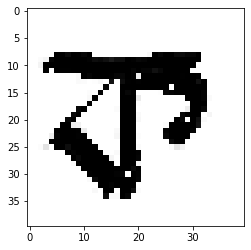

In [18]:
draw_n_guess_the_character()